In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dfTrain = pd.read_csv('kddTrain.csv')
dfTest = pd.read_csv('kddTest.csv')
#It can be found here https://mega.nz/#!qpNWUBia!2rAtAmt8F3lcXqSC18yhKhRonlFt0DdnB51c24uAXzk
#P.S. open the link in Desktop browser or in desktop mode of your mobile browser for best availability

In [4]:
dfTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,14,9,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0,0,14,9,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0,0,14,9,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0,0,14,9,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0,0,14,9,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

<h6>Scaling the training set</h6>

In [7]:
scaler.fit(dfTrain.drop('41', axis=1))
scaledTrainingFeatures = scaler.transform(dfTrain.drop('41', axis=1))

<h6>Scaling the testing set</h6>

In [8]:
scaler.fit(dfTest.drop('41', axis=1))
scaledTestingFeatures = scaler.transform(dfTest.drop('41', axis=1))

In [9]:
scaledTrainingFeatures

array([[-0.03263088, -0.71722614, -0.55780068, ..., -0.38013425,
        -0.13611098, -0.13271038],
       [-0.03263088, -0.71722614, -0.55780068, ..., -0.38013425,
        -0.13611098, -0.13271038],
       [-0.03263088, -0.71722614, -0.55780068, ..., -0.38013425,
        -0.13611098, -0.13271038],
       ...,
       [-0.03263088,  1.16473534,  0.14314134, ..., -0.38013425,
        -0.13611098, -0.13271038],
       [-0.03263088, -0.71722614, -0.55780068, ..., -0.38013425,
        -0.13611098, -0.13271038],
       [-0.03263088,  1.16473534,  2.15834965, ...,  2.63587189,
        -0.13611098, -0.13271038]])

In [11]:
dfTrainFeatures = pd.DataFrame(scaledTrainingFeatures, columns=dfTrain.columns[:-1])

In [12]:
dfTrainFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.032631,-0.717226,-0.557801,0.390241,-0.002681,-0.028888,-0.007185,-0.037076,-0.003149,-0.051478,...,0.388857,0.471474,0.44098,-0.216596,0.724146,-0.187,-0.381528,-0.380134,-0.136111,-0.13271
1,-0.032631,-0.717226,-0.557801,0.390241,-0.002681,-0.028888,-0.007185,-0.037076,-0.003149,-0.051478,...,0.388857,0.471474,0.44098,-0.216596,0.724146,-0.187,-0.381528,-0.380134,-0.136111,-0.13271
2,-0.032631,-0.717226,-0.557801,0.390241,-0.002681,-0.028888,-0.007185,-0.037076,-0.003149,-0.051478,...,0.388857,0.471474,0.44098,-0.216596,0.724146,-0.187,-0.381528,-0.380134,-0.136111,-0.13271
3,-0.032631,-0.717226,-0.557801,0.390241,-0.002681,-0.028888,-0.007185,-0.037076,-0.003149,-0.051478,...,0.388857,0.471474,0.44098,-0.216596,0.724146,-0.187,-0.381528,-0.380134,-0.136111,-0.13271
4,-0.032631,-0.717226,-0.557801,0.390241,-0.002681,-0.028888,-0.007185,-0.037076,-0.003149,-0.051478,...,0.388857,0.471474,0.44098,-0.216596,0.724146,-0.187,-0.381528,-0.380134,-0.136111,-0.13271


In [13]:
X_train = dfTrainFeatures
y_train = dfTrain['41']

In [15]:
dfTestFeatures = pd.DataFrame(scaledTestingFeatures, columns=dfTest.columns[:-1])
X_test = dfTestFeatures
y_test = dfTest['41']

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
KNN = KNeighborsClassifier()

In [18]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
predictions = KNN.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, predictions))
print ('\n')
print(classification_report(y_test, predictions))

[[ 25136    917]
 [   776 137845]]


             precision    recall  f1-score   support

          0       0.97      0.96      0.97     26053
          1       0.99      0.99      0.99    138621

avg / total       0.99      0.99      0.99    164674



In [22]:
errorRate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    predictionSamples = knn.predict(X_test)
    errorRate.append(np.mean(predictionSamples != y_test))

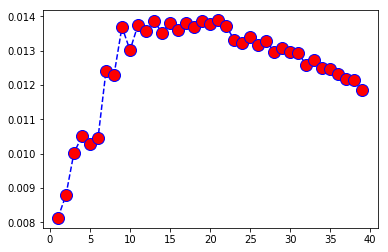

In [23]:
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12)

In [10]:
import timeit

In [12]:
X_train_nparray = scaledTrainingFeatures
X_test_nparray = scaledTestingFeatures
y_train_nparray = dfTrain['41']
y_test_nparray = dfTest['41']

In [13]:
startTime = timeit.default_timer()
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train_nparray, y_train_nparray)
predictions = knn.predict(X_test_nparray)
elapsedTime = timeit.default_timer() - startTime
print("elapsed time : ",elapsedTime)

NameError: name 'KNeighborsClassifier' is not defined

In [26]:
print(confusion_matrix(y_test_nparray, predictions))
print ('\n')
print(classification_report(y_test_nparray, predictions))

[[ 24747   1306]
 [   828 137793]]


             precision    recall  f1-score   support

          0       0.97      0.95      0.96     26053
          1       0.99      0.99      0.99    138621

avg / total       0.99      0.99      0.99    164674



In [27]:
'''TILL THIS ONLY KNN IS USED WHICH IS PROVIDING 96% ACCURACY WITH COMPUTATION TIME OF 0.0124'''

'TILL THIS ONLY KNN IS USED WHICH IS PROVIDING 96% ACCURACY WITH COMPUTATION TIME OF 0.0124'

In [28]:
'''NOW FROM HERE WE HAVE PASSED THE WHOLE DATA TO OUR SCA ALGORITHM '''

'NOW FROM HERE WE HAVE PASSED THE WHOLE DATA TO OUR SCA ALGORITHM '

In [29]:
data = dfTrainedFeatures

NameError: name 'dfTrainedFeatures' is not defined

In [ ]:
import random
import math


#SCA IMPLEMENTATION
#begin
totalFeatures = len(data.columns[:-1])
a = 1
r1 = a
t = 0
subsets = []    
trainedFeatures = []
#SETTING RANDOM SEED FOR REPRODUCABLE RESULTS
random.seed(14)
#Randomly initialization of each search agents in the population X(t = 1,2,...,m)
subsets.append(random.sample(range(1,totalFeatures),int(totalFeatures/3)))#initializing first random subset
lowestError = 100 #initializing as highest errorRate for comparison purpose


#Function for checking the new generated subset tempSet is already present in the already initialized subsets or not
def isRepeat(presentSubsets, newSubset):
    #print(subsets)
    #print(tempSet)
    newSubset.sort()
    for subset in presentSubsets:
        subset.sort()
        if(subset[:] == newSubset[:]):
            return True
    return False
        
#for generating random search agents in the population   
def randomSearchAgents(m, n):
    i = 1
    while i<m:
        X = random.sample(range(1,totalFeatures),n)
        if (isRepeat(subsets, X) == False):
            subsets.append(X)
            i += 1
        else:
            continue
            
#EQUATION 1
def updateUsingSineCosine(X):
    featureSubset = []
    for j in range(len(X)):
        #print(X[j])
#         if(s%2 == 0):
        feature = int(X[j] + r1*math.sin(r2)*abs(r3*P[j]-X[j]))
#         else:
#             feature = int(X[j] + r1*math.cos(r2)*abs(r3*P[j]-X[j]))
        feature %= totalFeatures
        featureSubset.append(feature)
    return featureSubset


#FOR CHECKING THE SCORE FOR EACH SELECTED FEATURE SUBSET
def trainTestScore(X, y):
    X.head()
    startTime = timeit.default_timer()
    knn = KNeighborsClassifier(n_neighbors = 17)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
#     print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    errorRate.append(error)
    return error

#here subsets list contains the list of randomly initialized search agent indices

#INITIALIZE the max numbers of iteration Tmax, we can take it as the total number of columns present
Tmax = totalFeatures
P = []

'''randomly initialize feature subsets, parameter1 denotes total number of feature subsets, here taken as total no of feature avaiable
and parameter 2 denotes number of features in each subsets, here we are considering one third of the total number of features'''

randomSearchAgents(totalFeatures, int(totalFeatures/3))

print("randomly initialized subsets: ",subsets)

trainedFeatures = subsets[:]



while t<Tmax:
    #foreach search agent Xi in the population do
    '''NOVEL 
        here the feature subsets generated by randomSearchAgents method are not repeatative, 
        if any randomly generated feature subset is already present in the previous generated 
        ones then it is neglected and a new feature subset is generated randomly and checked again.
        This process continues until required number of feature subsets are generated which are all unique
    NOVEL'''
    for subset in subsets:
        #Evaluate Xi via the fitness function. if f(Xi)
        if(t > 0):
            if(isRepeat(trainedFeatures, subset) == False):
                trainedFeatures.append(subset)
                #print(trainedFeatures)
#                 print('new feature : ',subset, "t=",t)
#             else:
#                 print("repeat")
        error = trainTestScore(data.iloc[:,subset], df['TARGET CLASS'])
#       print("subset : ",subset," error : ",error, " lowest error : ", lowestError)
        #if f(Xi) better than f(P) then
        #Set P = Xi;
        if (error < lowestError):
            P = subset
            lowestError = error

    #Update r1 using equation 2

    r1 = a - t*(a/Tmax)#equation 2

    #Generate randomly new values for r2, r3 and s.

    r2 = random.uniform(0.1, 1.0)
    r3 = random.uniform(0.1, 1.0)
#   print('\n\n r2:',r2,' r3:',r3,' r1:',r1)
    #foreach search agent Xi in the population do
    #Update Xi using equation 1.
    for i in range(len(subsets)):
        subsets[i] = updateUsingSineCosine(subsets[i])
#     print(subsets)
#     print(P)
    t += 1
#Return P best solution obtained so far.
print("best solution: ",P)
print(lowestError)

In [ ]:
startTime = timeit.default_timer()
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
elapsedTime = timeit.default_timer() - startTime
print("time taken : ",elapsedTime)
error = np.mean(prediction != y_test)
print("error : ",error)

In [ ]:
print(confusion_matrix(y_test, prediction))
print ('\n')
print(classification_report(y_test, prediction))

<h4>'''OUR SCA IS TAKIING VERY REDUCED TIME OF 0.0098 AND PROVIDING ACCURACY OF 94%'''</h4>